#### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

In [2]:
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()



오차행렬
[[68 19]
 [17 39]]
정확도 : 0.7482517482517482, 재현율 : 0.6964285714285714, 정밀도 : 0.7482517482517482, f1_score : 0.6842105263157895


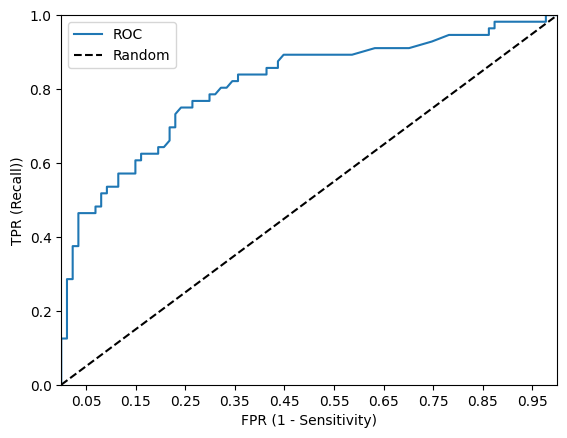

ROC AUC 값 : 0.8103448275862069


In [4]:
# titanic.csv import
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_df = pd.read_csv('./datasets/titanic_train.csv')
train_set = train_df[['Survived', 'Pclass', 'Sex', 'Age']]
from sklearn.preprocessing import LabelEncoder

scaler = LabelEncoder()

result = scaler.fit_transform(train_set[['Sex']])

train_set['Sex'] = result
train_set.dropna(inplace=True)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy}, 재현율 : {recall}, 정밀도 : {accuracy}, f1_score : {f1score}')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(train_set[['Pclass', 'Sex', 'Age']], train_set['Survived'], test_size=0.2, random_state=42)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_class1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR (1 - Sensitivity)')
    plt.ylabel('TPR (Recall))')    
    
    plt.legend()
    plt.show()
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC 값 : {roc_score}')